# Background research on emissions in the USA
According to the "State of the Air" report 2020 by the American Lung Association there is a general decreasing trend in emissions since the 1970's in the US.

According to https://www.cabq.gov/airquality/trends there is also a downward trend between 2000 - 2015 in:

* Ozone (parts per million, ppm)
* Carbon Monoxide (parts per million, ppm)
* Nitrogen Dioxide (parts per billion, ppb) concentration in Albuqurque.
* Levels of Sulfur Dioxide and particulate matter (both 10 and 2.5 microns) however appear to be stable over the same time period. 

For reference a human hair is aproximately 70 microns wide.

Mandatory emissions checks on cars where implemented in 1983.

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="darkgrid")
import plotly.express as px

### What is the change and percent change of pollutants mentioned in Abq 'Trends'?

In [2]:
#Change in Ozone levels (Parts per million)
level_ozone_2000 = 0.075
level_ozone_2015 = 0.066
change_ozone = round(level_ozone_2015 - level_ozone_2000, 4)

#Change in Carbon Monoxide levels (Parts per million)
level_CO_2000 = 3.8
level_CO_2015 = 1.4
change_CO = round(level_CO_2015 - level_CO_2000, 4)

#Change in Nitrogen Dioxide levels (Parts per billion)
level_NO_2000 = 65
level_NO_2015 = 45
change_NO = level_NO_2015 - level_NO_2000
#convert to ppm
change_NO = change_NO/1000

In [3]:
#Percent change Ozone
percent_ozone = round(change_ozone/level_ozone_2000 * 100, 4)
percent_CO = round(change_CO/level_CO_2000 * 100, 4)
precent_NO = round(change_NO/level_NO_2000 * 100, 4)

In [4]:
data = {"change_ppm": [change_ozone, change_CO, change_NO], "percent_change": [percent_ozone, percent_CO, precent_NO]}
df_change = pd.DataFrame(data = data, index = ["Ozone", "Carbon_Monoxide", "Nitrogen_Dioxide"])
print("Change in three air pollutants from 2000 to 2015 in Albuquerque")
df_change

Change in three air pollutants from 2000 to 2015 in Albuquerque


,change_ppm,percent_change
Ozone,-0.009,-12.0000
Carbon_Monoxide,-2.400,-63.1579
Nitrogen_Dioxide,-0.020,-0.0308


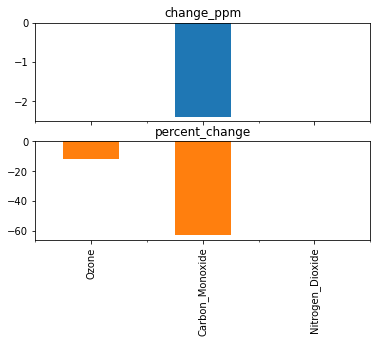

In [14]:
df_change.plot(kind='bar', subplots=True, legend=False)
None

### Is there a difference in emissions between 1982 (before mandatory car testing) and 2020?
Data is from:  https://www.epa.gov/outdoor-air-quality-data/air-data-daily-air-quality-tracker 
The metric is the Air Quality Index (AQI) for Ozone. Note: I chose not to use the combined Ozone and and PM2.5 (Particulate Matter 2.5 microns) score, as for 1982 only the Ozone value was used in the combined score.

In [15]:
DATA_1982 = Path("data/1982_aqi_data.csv")
DATA_2020 = Path("data/2020_aqi_data.csv")

In [16]:
df_1982 = pd.read_csv(DATA_1982, parse_dates=[0,8,9], skipinitialspace=True)

In [17]:
df_2020 = pd.read_csv(DATA_2020, parse_dates=[0,8,9], skipinitialspace=True)

In [ ]:
#df = pd.concat([df_1982, df_2020], ignore_index=True)
#df['Year'] = pd.DatetimeIndex(df['Date']).year
#df.to_csv("data/combined_air_data.csv")

In [20]:
DATA_COMBINED = Path("data/combined_air_data.csv")
df = pd.read_csv(DATA_COMBINED)
df.head()

,Unnamed: 0,Date,Ozone AQI Value,Site Name,Site ID,Source,20-year High (2000-2019),20-year Low (2000-2019),5-year Average (2015-2019),Date of 20-year High,Date of 20-year Low,Year,month_day
0,0,1982-01-01,26,Foothills,35-001-1012,AQS,44,27,31.8,2013-01-01,2001-01-01,1982,01-01
1,1,1982-01-02,30,Foothills,35-001-1012,AQS,49,31,35.4,2007-01-02,2002-01-02,1982,01-02
2,2,1982-01-03,37,NaN,35-043-1001,AQS,43,24,37.8,2006-01-03,2005-01-03,1982,01-03
3,3,1982-01-04,31,Foothills,35-001-1012,AQS,42,29,38.4,2019-01-04,2001-01-04,1982,01-04
4,4,1982-01-05,28,Foothills,35-001-1012,AQS,43,24,32.8,2013-01-05,2001-01-05,1982,01-05


In [21]:
df_no_leap_year = df[df['Date'] != '2020-02-29']
day_of_year = list(range(1,366)) + list(range(1,366))
df_no_leap_year['day_of_year'] = day_of_year
df_no_leap_year.head()

/Users/hanbo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,Date,Ozone AQI Value,Site Name,Site ID,Source,20-year High (2000-2019),20-year Low (2000-2019),5-year Average (2015-2019),Date of 20-year High,Date of 20-year Low,Year,month_day,day_of_year
0,0,1982-01-01,26,Foothills,35-001-1012,AQS,44,27,31.8,2013-01-01,2001-01-01,1982,01-01,1
1,1,1982-01-02,30,Foothills,35-001-1012,AQS,49,31,35.4,2007-01-02,2002-01-02,1982,01-02,2
2,2,1982-01-03,37,NaN,35-043-1001,AQS,43,24,37.8,2006-01-03,2005-01-03,1982,01-03,3
3,3,1982-01-04,31,Foothills,35-001-1012,AQS,42,29,38.4,2019-01-04,2001-01-04,1982,01-04,4
4,4,1982-01-05,28,Foothills,35-001-1012,AQS,43,24,32.8,2013-01-05,2001-01-05,1982,01-05,5


In [24]:
#create rolling average instead of raw data
df_no_leap_year['simple_moving_average'] = df_no_leap_year.iloc[:,2].rolling(window=5).mean()

/Users/hanbo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
fig3 = px.line(df_no_leap_year.iloc[0:364], x='day_of_year', y='5-year Average (2015-2019)',
               labels={
                   "day_of_year": "Day in Year"
               },
              title="Albuquerque Ozone Air Quality Index Five Year Average")
fig3.add_shape(# add a threshold line between 'Good' air and above
    type="line", line_color="salmon", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=365, xref="x", y0=50, y1=50, yref="y")
fig3.add_annotation(#add text over threshhold line
    text="Good Air Quality Boundary", x=320, y=52, showarrow=False)
fig3.show()